In [1]:
import sys
!{sys.executable} -m pip install msgpack
!{sys.executable} -m pip install mpmath
!{sys.executable} -m pip install powerlaw

You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import powerlaw
from scipy.io import loadmat
import numpy as np

In [8]:
x = loadmat('synth.mat')
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [9]:
x['durs'].shape

(12, 3)

In [10]:
x['durs'][0][0][0]

array([2, 1, 1, ..., 1, 1, 4], dtype=uint8)

In [15]:
i=0
j=0
d = x['durs'][i][j][0]
fit = powerlaw.Fit(d, xmin=min(d), xmax=max(d), discrete=True)
# fit = powerlaw.Fit(d, xmin=min(d), xmax=30)
# fit = powerlaw.Fit(d)
print('({},{}), a={}, s={}'.format(fit.xmin, fit.xmax, fit.alpha, fit.sigma))

(1.0,20.0), a=2.180115401639285, s=0.0011801154016392852


#### Power law

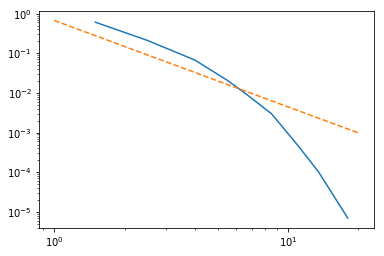

In [16]:
fig = powerlaw.plot_pdf(d)
fit.power_law.plot_pdf(linestyle='--', ax=fig)

#### Truncated power law

Assuming nested distributions


(-47222.39980695331, 0.0)

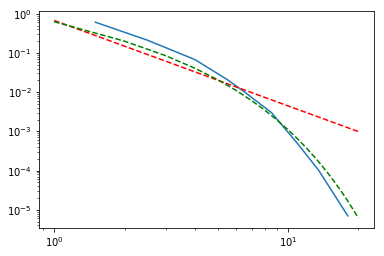

In [17]:
fig = powerlaw.plot_pdf(d)
fit.power_law.plot_pdf(color='r', linestyle='--', ax=fig)
fit.truncated_power_law.plot_pdf(color='g', linestyle='--', ax=fig)
fit.distribution_compare('power_law', 'truncated_power_law')

In [18]:
print('{}'.format(1/fit.truncated_power_law.parameter2))
vars(fit.truncated_power_law)

2.224081407245662


{'xmin': 1.0,
 'xmax': 20.0,
 'discrete': True,
 'fit_method': 'Likelihood',
 'discrete_approximation': 'round',
 'parameter1': 1.0000000007720873,
 'parameter2': 0.4496238297492968,
 'parameter3': None,
 'parameter1_name': 'alpha',
 'parameter2_name': 'lambda',
 'parameter3_name': None,
 'parent_Fit': <powerlaw.Fit at 0x1a2805afd0>,
 'alpha': 1.0000000007720873,
 'Lambda': 0.4496238297492968,
 'noise_flag': False,
 'loglikelihood': -1176666.0476920118,
 'D_plus': 1.0000000000287557e-06,
 'D_minus': 0.026711935685834742,
 'Kappa': 0.9939774205247228,
 'V': 0.02671293568583477,
 'D': 0.026711935685834742,
 'Asquare': inf}

#### Exponential

(-43099.61526988556, 0.0)

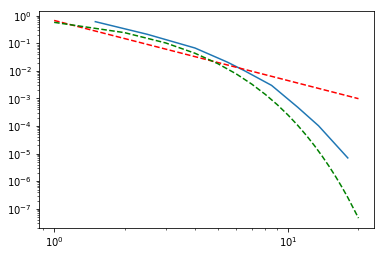

In [19]:
fig = powerlaw.plot_pdf(d)
fit.power_law.plot_pdf(color='r', linestyle='--', ax=fig)
fit.exponential.plot_pdf(color='g', linestyle='--', ax=fig)
fit.distribution_compare('power_law', 'exponential')

#### Lognormal

(-46663.80170567283, 0.0)

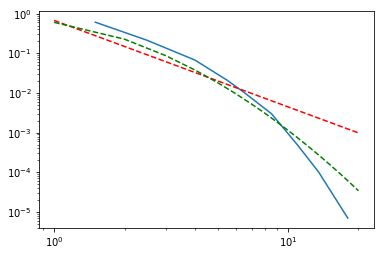

In [20]:
fig = powerlaw.plot_pdf(d)
fit.power_law.plot_pdf(color='r', linestyle='--', ax=fig)
fit.lognormal.plot_pdf(color='g', linestyle='--', ax=fig)
fit.distribution_compare('power_law', 'lognormal')